In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv("Data/finalTrain.csv")

In [4]:
#segregate the numerical and categorical features
df.head()
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical:",numerical_columns)
print("Categorical:",categorical_columns)

Numerical: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')
Categorical: Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [4]:
df[numerical_columns]


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,41
...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1,0.0,32
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,0,1.0,36
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1,0.0,16
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,1.0,26


In [5]:
df[numerical_columns].describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [6]:
df[categorical_columns].describe()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,45584,1320,44,176,193,6,4,4,4,2,3
top,0xcdcd,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,461,495,7653,15476,11530,26429,44460,34087


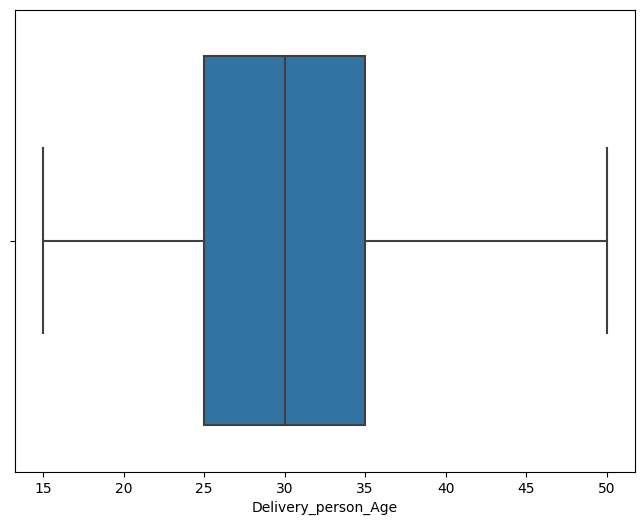

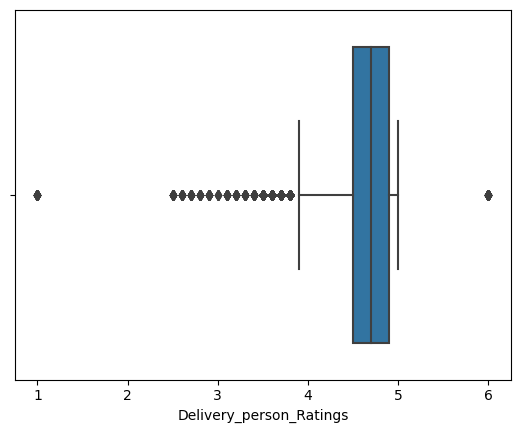

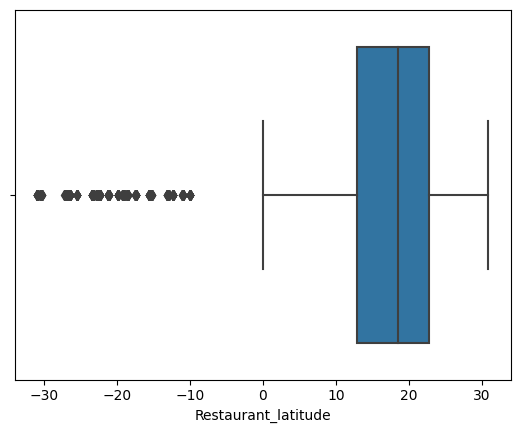

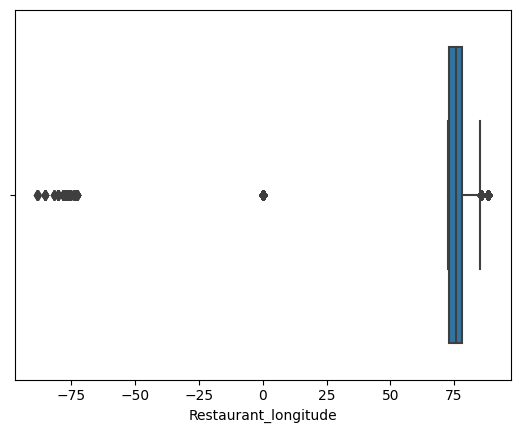

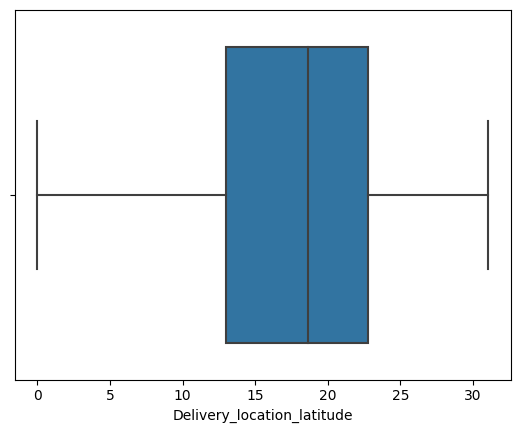

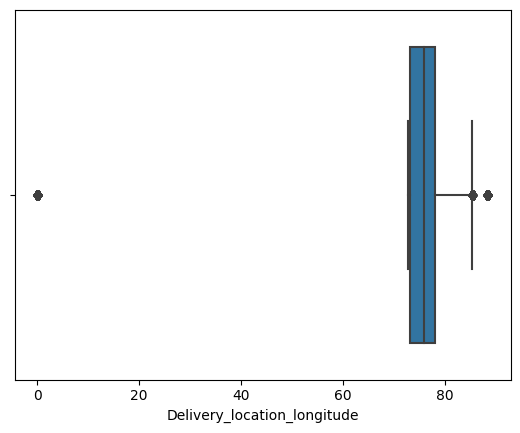

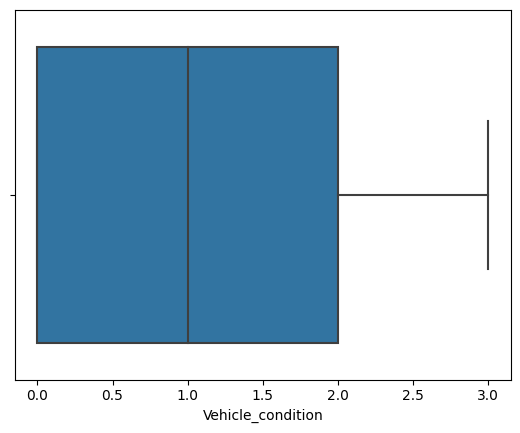

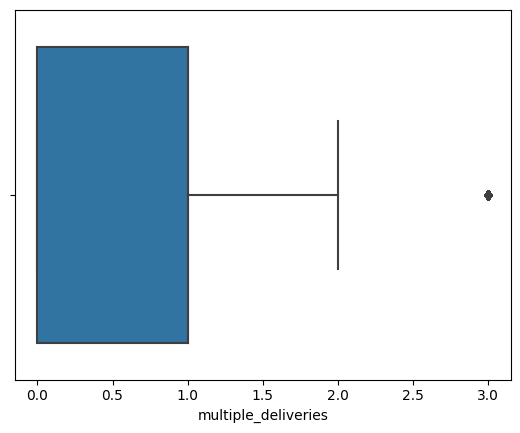

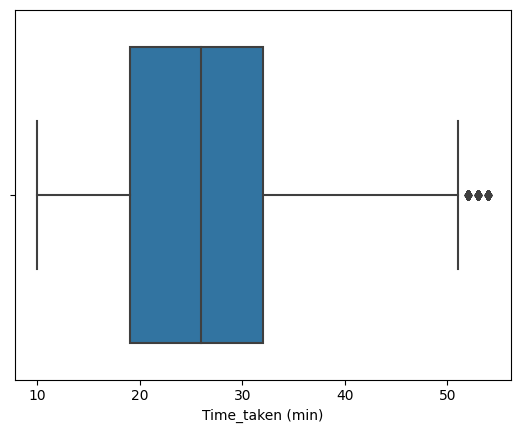

In [7]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [8]:
#outliers available in the numerical columns
for k, v in df[numerical_columns].items():
       q1 = v.quantile(0.25)
       q3 = v.quantile(0.75)
       irq = q3 - q1
       v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
       perc = np.shape(v_col)[0] * 100.0 / np.shape(df[numerical_columns])[0]
       print(f"Column {k} outliers = {round(perc,2)}%")

Column Delivery_person_Age outliers = 0.12%
Column Delivery_person_Ratings outliers = 2.68%
Column Restaurant_latitude outliers = 0.95%
Column Restaurant_longitude outliers = 10.21%
Column Delivery_location_latitude outliers = 0.0%
Column Delivery_location_longitude outliers = 14.29%
Column Vehicle_condition outliers = 0.0%
Column multiple_deliveries outliers = 0.79%
Column Time_taken (min) outliers = 0.59%


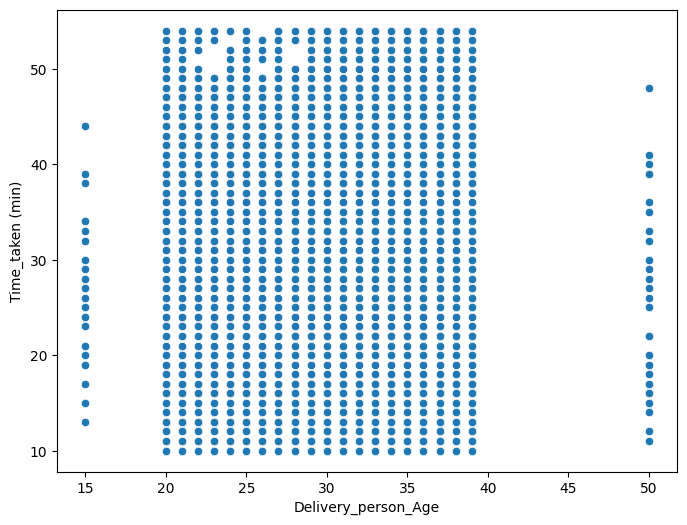

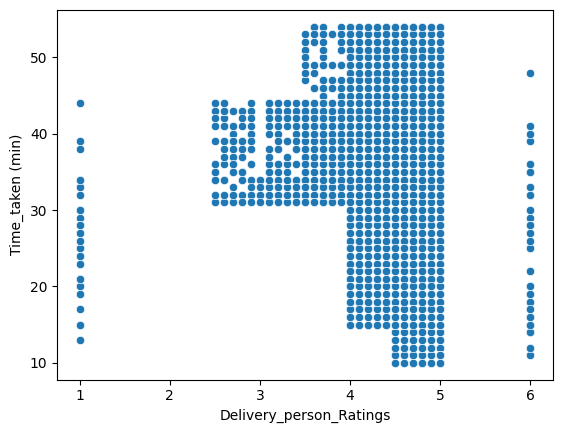

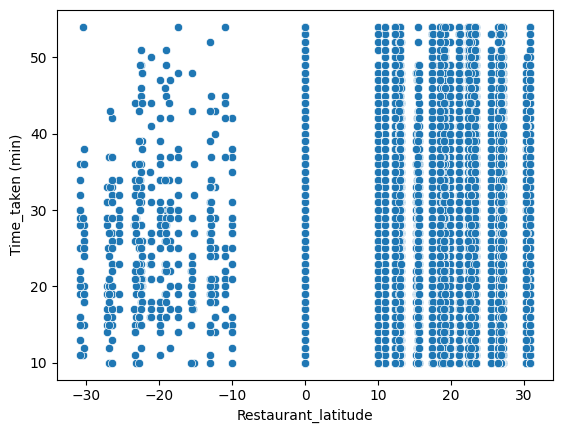

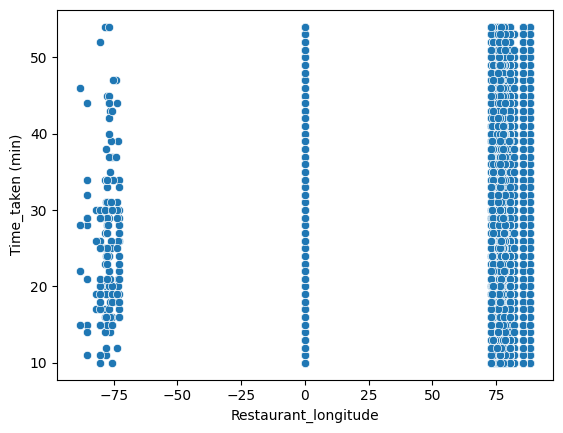

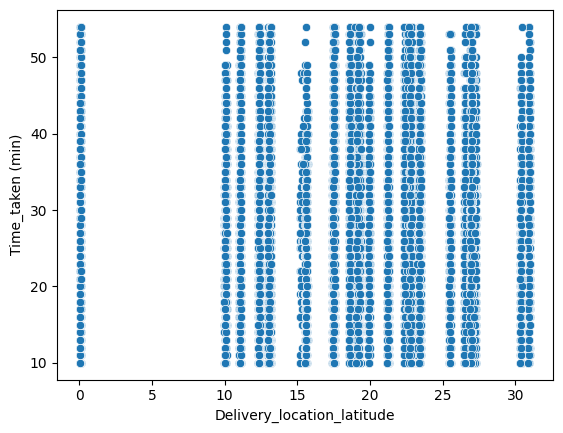

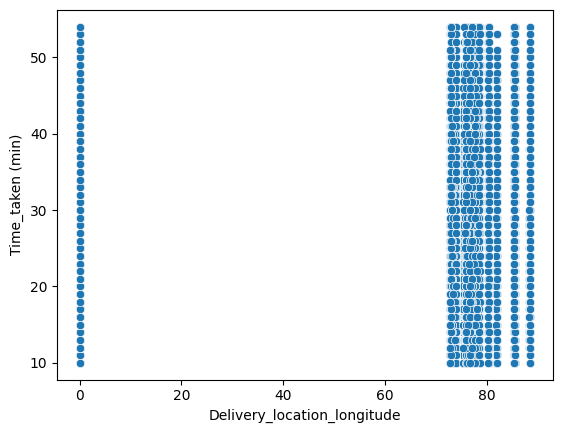

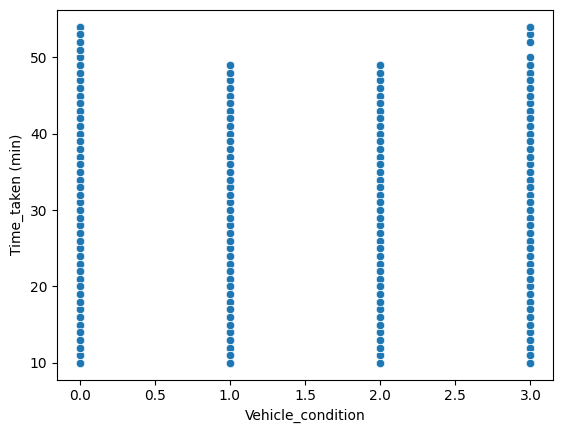

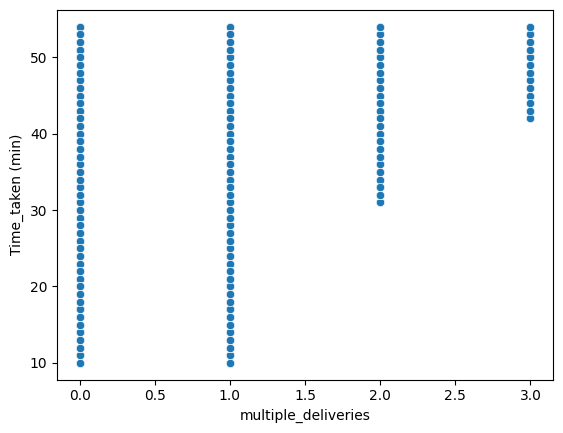

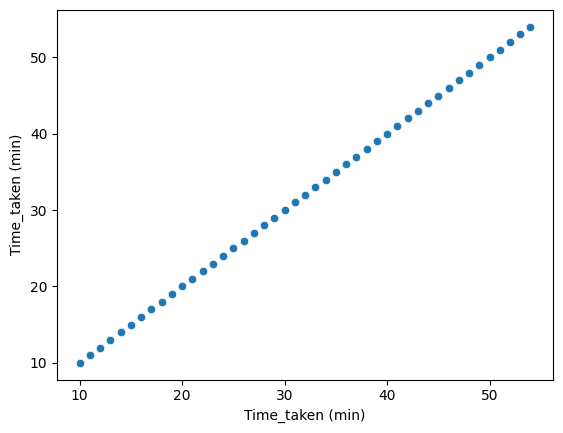

In [9]:
#Bivariate analysis for Numerical Data
plt.figure(figsize=(8,6))

for i in numerical_columns:
    sns.scatterplot(data=df, x=i,y='Time_taken (min)')
    plt.show()

<Figure size 800x600 with 0 Axes>

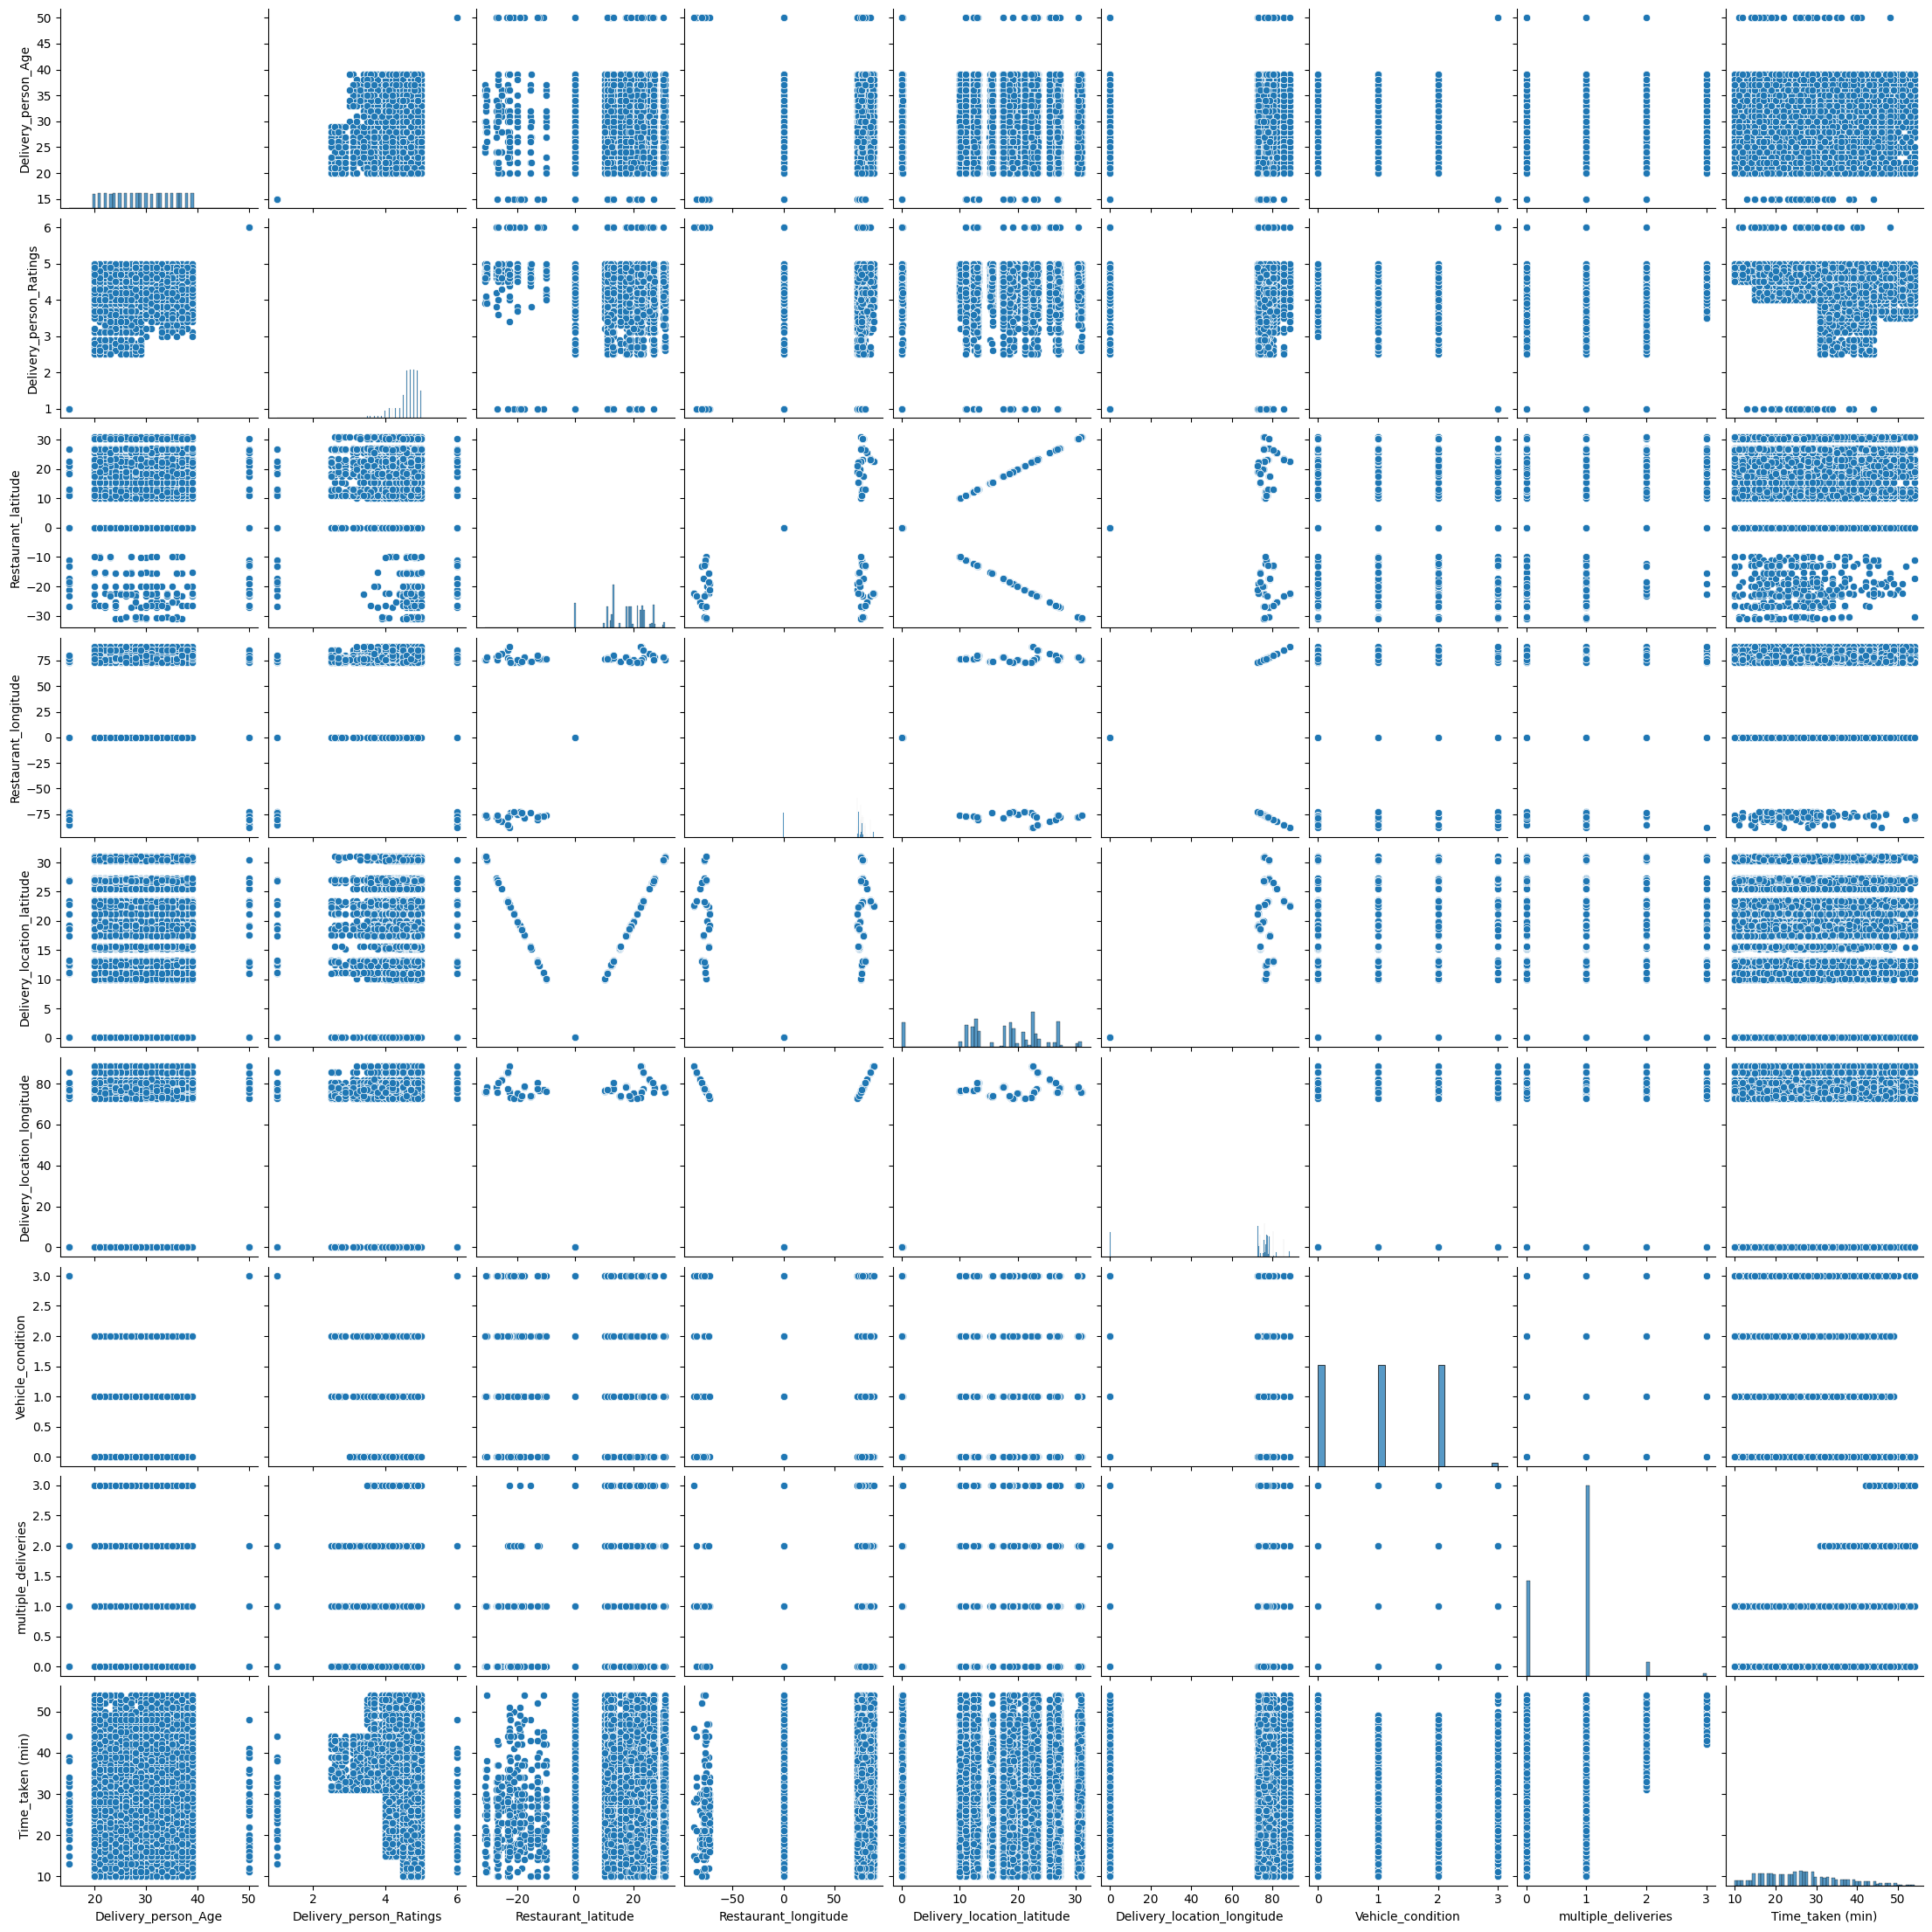

In [11]:
plt.figure(figsize=(8,6))
sns.pairplot(data=df)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9844\2269385913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

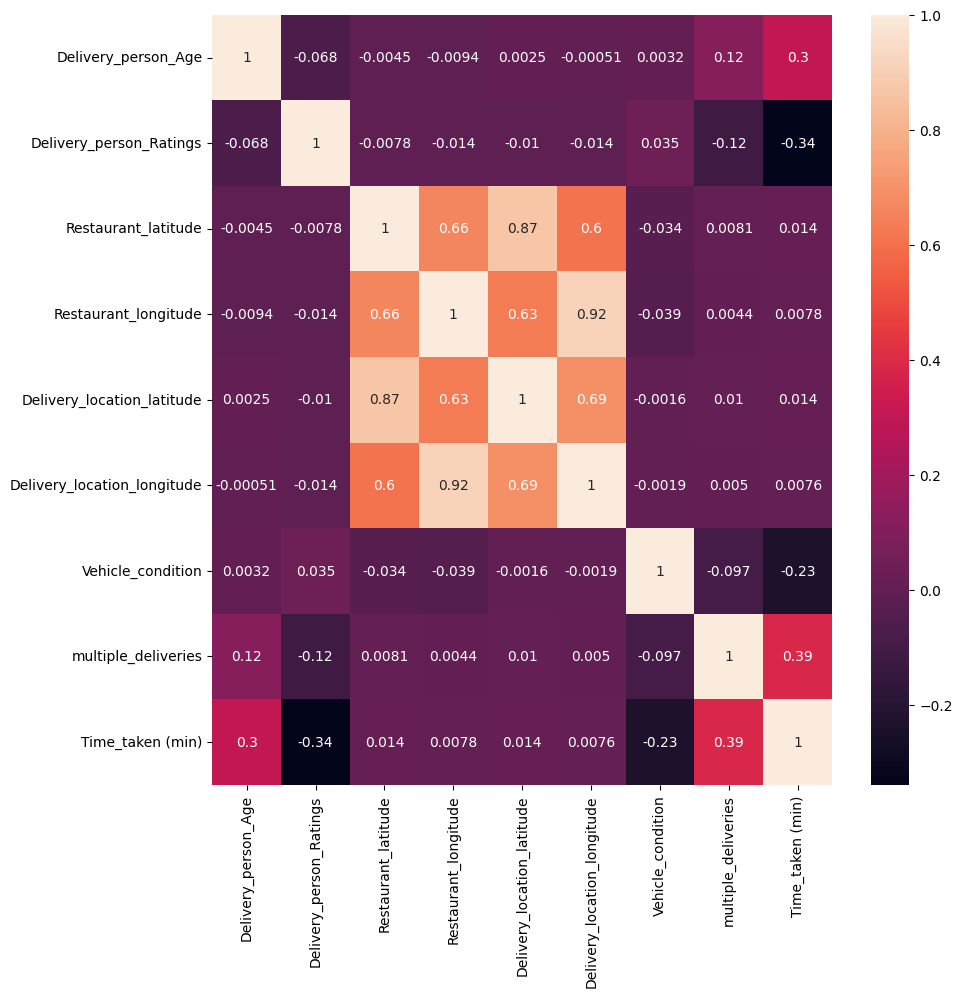

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [18]:
#visualization for the categorical data
plt.figure(figsize=(8,6))

for i in categorical_columns:
    
    sns.countplot(data=df, x=i)
    plt.show()

KeyboardInterrupt: 

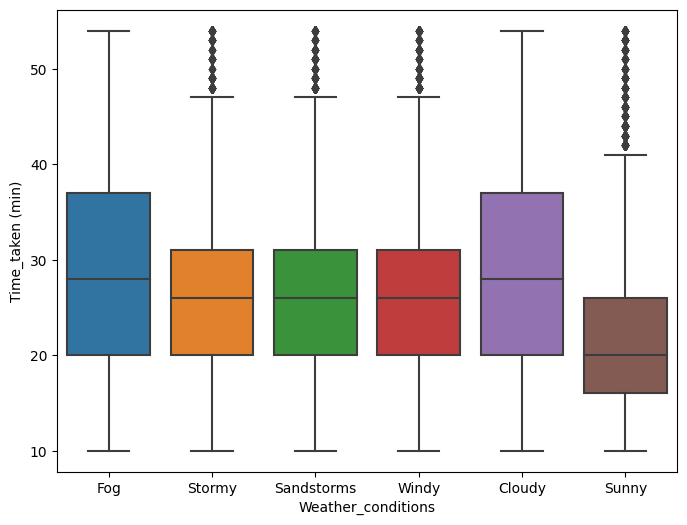

In [5]:
#Bivariate analysis
plt.figure(figsize=(8,6))

sns.boxplot(data=df, x=df['Weather_conditions'],y=df['Time_taken (min)'])
plt.show()

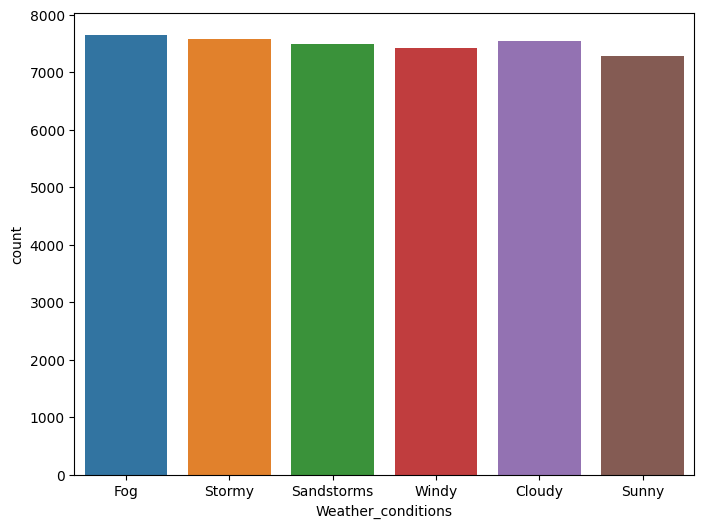

In [7]:
#Bivariate analysis
plt.figure(figsize=(8,6))

sns.countplot(data=df, x=df['Weather_conditions'])
plt.show()

In [148]:
#Bivariate analysis
plt.figure(figsize=(8,6))

for i in categorical_columns:
    sns.boxplot(data=df, x=i,y=df['Time_taken (min)'])
    plt.show()

KeyboardInterrupt: 

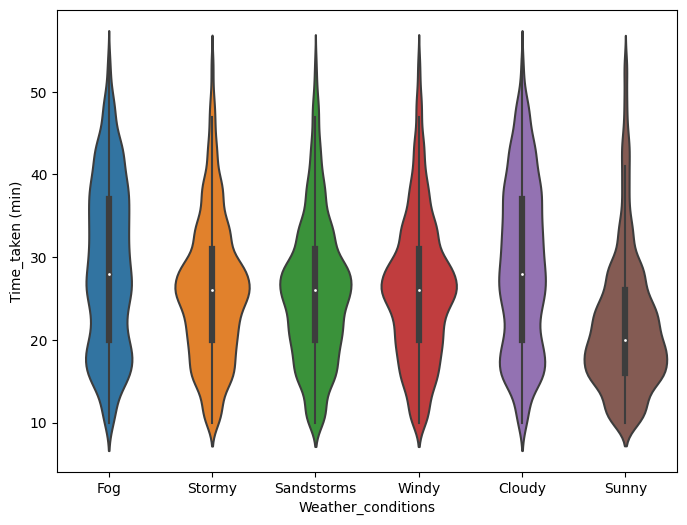

In [9]:
#Bivariate analysis
plt.figure(figsize=(8,6))

sns.violinplot(data=df, x=df['Weather_conditions'],y=df['Time_taken (min)'])
plt.show()

In [14]:
df[categorical_columns].dtypes

ID                      object
Delivery_person_ID      object
Order_Date              object
Time_Orderd             object
Time_Order_picked       object
Weather_conditions      object
Road_traffic_density    object
Type_of_order           object
Type_of_vehicle         object
Festival                object
City                    object
dtype: object

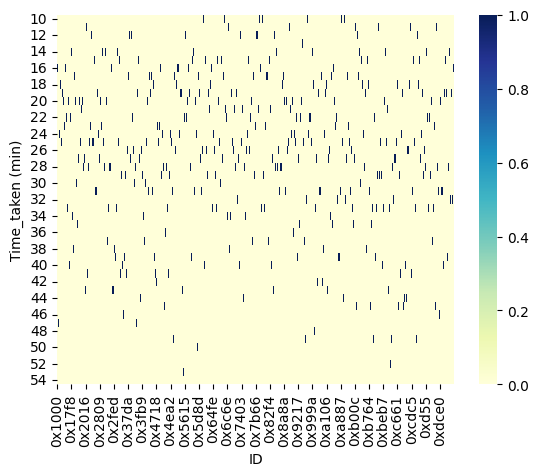

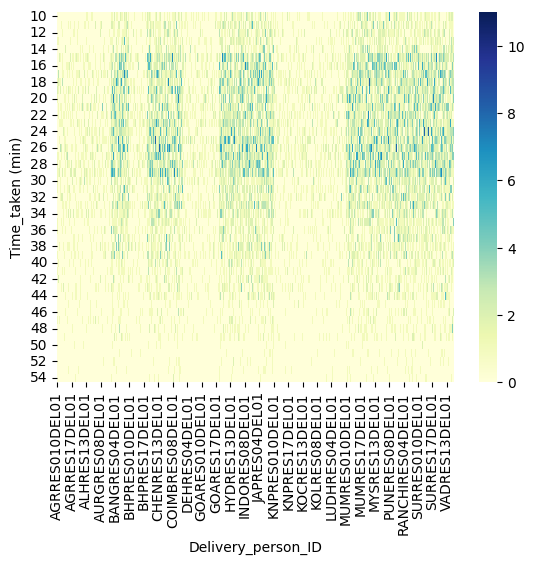

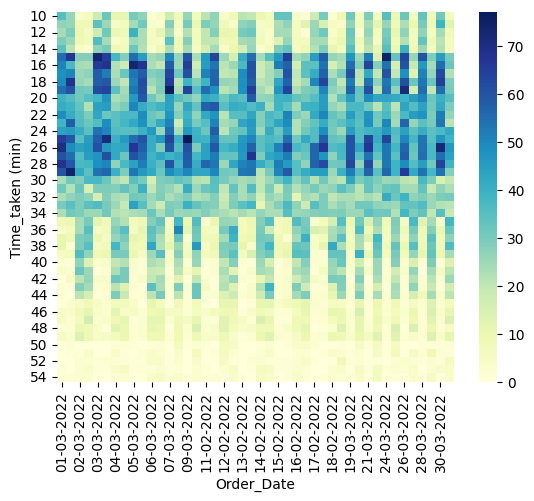

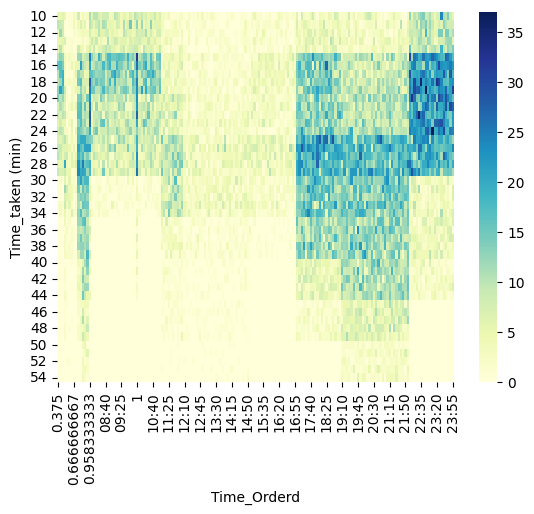

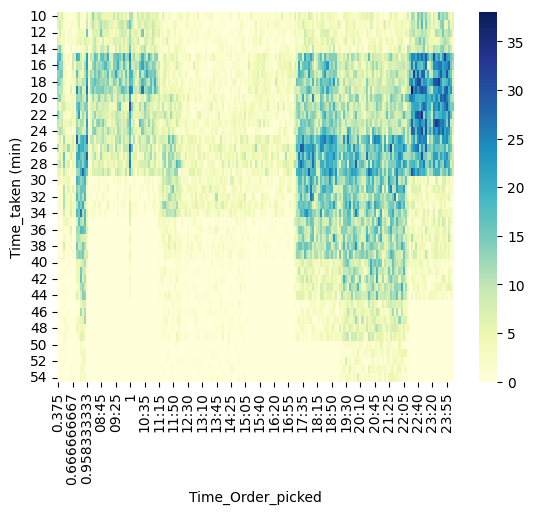

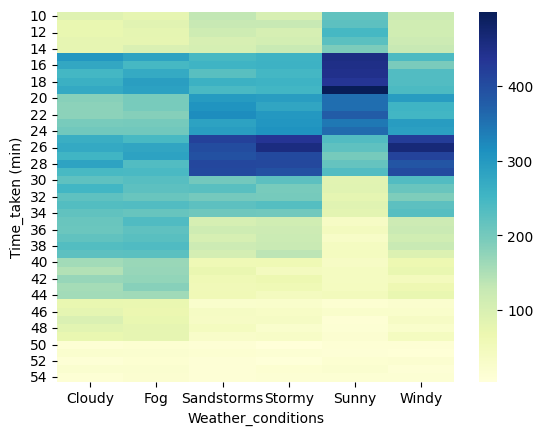

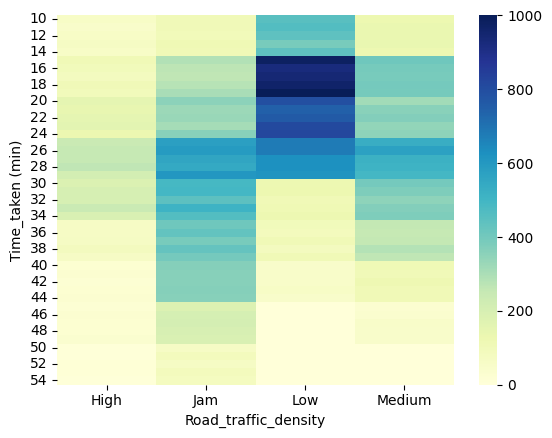

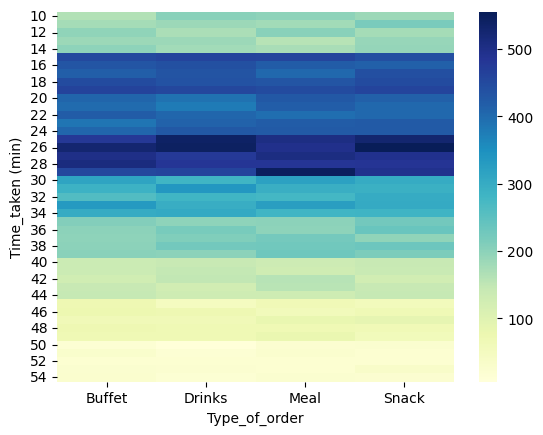

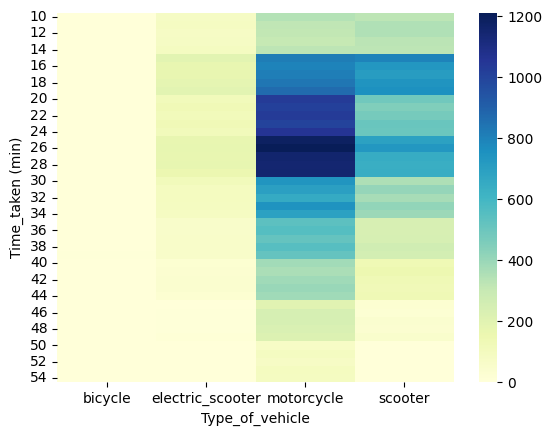

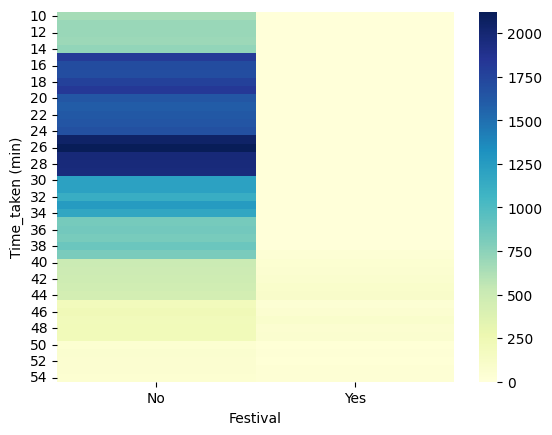

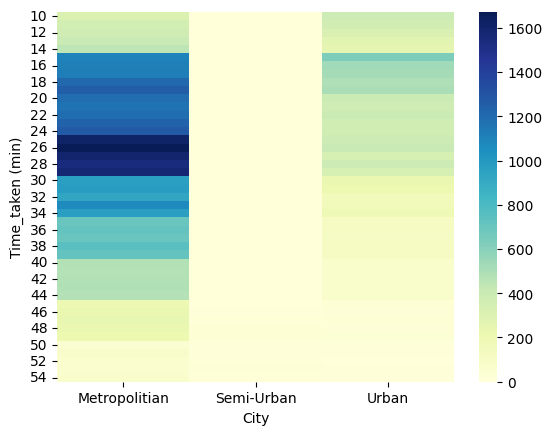

In [17]:
for i in categorical_columns:

    sns.heatmap(pd.crosstab(df['Time_taken (min)'], df[i]), cmap='YlGnBu')
    plt.show()

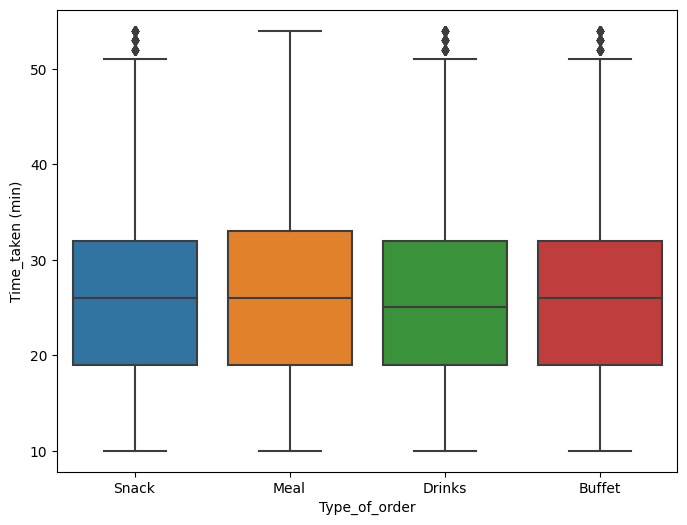

In [5]:
#Bivariate analysis
plt.figure(figsize=(8,6))

sns.boxplot(data=df, x=df['Type_of_order'],y=df['Time_taken (min)'])
plt.show()

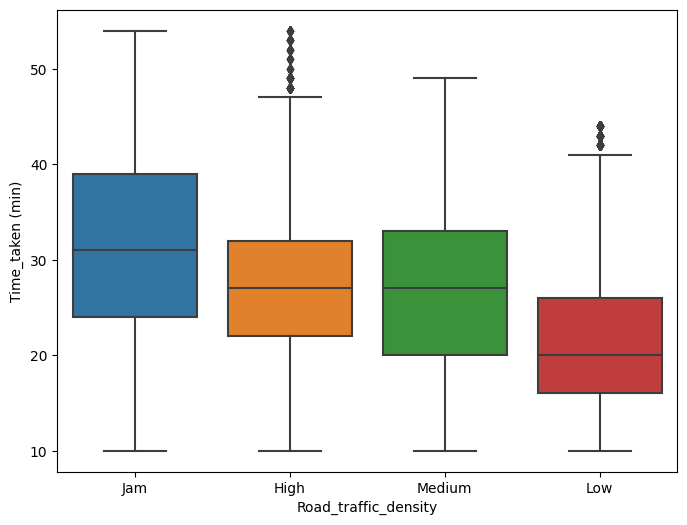

In [6]:
#Bivariate analysis
plt.figure(figsize=(8,6))

sns.boxplot(data=df, x=df['Road_traffic_density'],y=df['Time_taken (min)'])
plt.show()

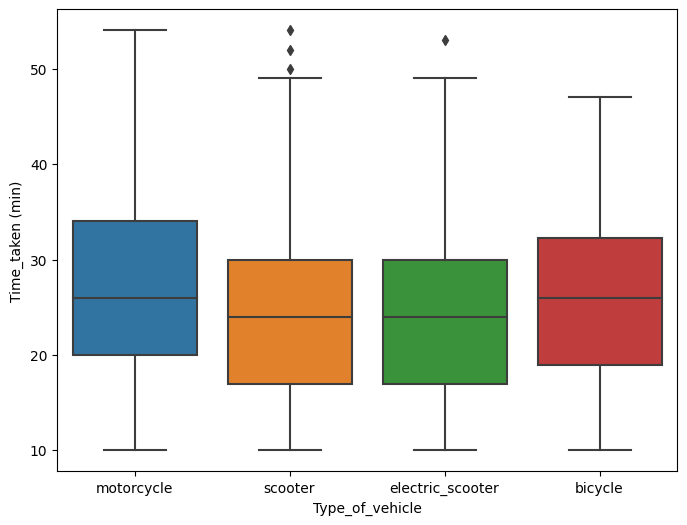

In [7]:
#Bivariate analysis
plt.figure(figsize=(8,6))

sns.boxplot(data=df, x=df['Type_of_vehicle'],y=df['Time_taken (min)'])
plt.show()

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Fit ANOVA model
model = ols('numerical_columns ~ C(categorical_columns)', data=df).fit()

# Print ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

PatsyError: Number of rows mismatch between data argument and numerical_columns (45584 versus 9)
    numerical_columns ~ C(categorical_columns)
    ^^^^^^^^^^^^^^^^^

In [10]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.1/9.1 MB 8.6 MB/s eta 0:00:00
     ------------------------------------- 233.8/233.8 kB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip
